In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
import torch
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from LSTM_algo import LSTMAnalyzer

### Changing device to GPU

In [2]:
# is_cuda = torch.cuda.is_available()

# # If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
# if is_cuda:
#     device = torch.device("cuda")
#     print("GPU is available")
# else:
#     device = torch.device("cpu")
#     print("GPU not available, CPU used")

device = torch.device("cpu")

### Loading Dataset

In [3]:
sample_size = 90000
dataset = pd.read_csv("../data/reviews_dataset.csv")
dataset = dataset.sample(frac=1)
x_train, x_test, y_train, y_test = train_test_split(dataset["text"].values[:sample_size], dataset["labels"].values[:sample_size], test_size=0.3, random_state=42)

print("Train dataset size -> Sample {}, Labels {}".format(x_train.shape, y_train.shape))
print("Test dataset size -> Sample {}, Labels {}".format(x_test.shape, y_test.shape))

Train dataset size -> Sample (63000,), Labels (63000,)
Test dataset size -> Sample (27000,), Labels (27000,)


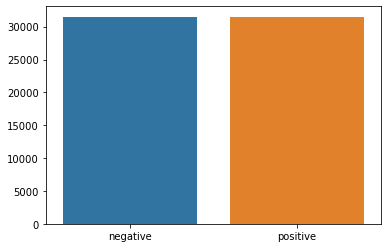

In [4]:
dd = pd.Series(y_train).value_counts()
sns.barplot(x=np.array(['negative','positive']),y=dd.values)
plt.show()

In [5]:
no_layers = 2
embedding_dim = 64
output_dim = 1
hidden_dim = 256
device = device

lstm = LSTMAnalyzer(no_layers, output_dim,
                    hidden_dim, embedding_dim, device, 
                    batch_size = 50, drop_prob=0.5)
lstm.to(device)

lstm.process_dataset(x_train, y_train, x_test, y_test)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/vaishanth/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


cpu


/home/vaishanth/Workspace/ENPM809K/Web-Scraping-And-Contextual-Analysis-of-Reviews/algorithms/LSTM_algo.py:100: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(final_list_train), np.array(final_list_test), onehot_dict


Tokenized dataset
Padded dataset
Loaded datasets as tensors
Initializng layers


In [6]:
lstm.train_model()

KeyboardInterrupt: 